In [1]:
import os
os.getenv("GOOGLE_API_KEY")

'AIzaSyBRx4ncuhzrEk4LIkoaa0t7GpgbA53QdswS'

In [2]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

USE A GOOD REASONING MODEL FOR APPROPRIATE RESULTS 

In [4]:
llm=ChatGroq(model = "gemma2-9b-it")

In [5]:
llm.invoke("hi there, who are you?")

AIMessage(content="Hello! I am Gemma, an open-weights AI assistant. I'm a large language model, which means I'm trained on a massive amount of text data. This allows me to communicate and generate human-like text in response to a wide range of prompts and questions.\n\nWhat can I do for you today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 16, 'total_tokens': 85, 'completion_time': 0.125454545, 'prompt_time': 0.001917788, 'queue_time': 0.24402264099999998, 'total_time': 0.127372333}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--91c9358e-0834-428c-aa10-f91cc7d9ee6b-0', usage_metadata={'input_tokens': 16, 'output_tokens': 69, 'total_tokens': 85})

In [6]:
print(llm.invoke("hi there, who are you?").content)

Hello! I am Gemma, an open-weights AI assistant.

I'm a large language model trained by Google DeepMind. This means I can understand and generate human-like text. I can answer your questions, write stories, summarize information, and much more.

Since I'm open-weights, my weights are publicly available. This means anyone can access and study how I work.



In [7]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from IPython.display import Image, display
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

In [8]:

def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}
    



THIS CODE IS ONLY FOR TESTING

In [9]:
state={"messages":["hi hello how are you?"]}
call_model(state)


{'messages': [AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to help! How can I assist you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 15, 'total_tokens': 47, 'completion_time': 0.058181818, 'prompt_time': 0.003397917, 'queue_time': 0.387930869, 'total_time': 0.061579735}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--cc072a1f-16e2-4b23-a870-3df3d7a64710-0', usage_metadata={'input_tokens': 15, 'output_tokens': 32, 'total_tokens': 47})]}

Simple workflow without tool calling

In [10]:
workflow = StateGraph(MessagesState)

In [11]:
workflow.add_node("mybot",call_model)

In [12]:
workflow.add_edge(START,"mybot")

In [13]:
workflow.add_edge("mybot",END)

In [14]:
app = workflow.compile()

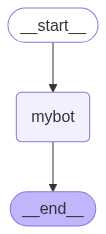

In [15]:
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
input = {"messages":["hi hello how are you?"]}

In [17]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='3b82f249-e2bb-43f5-8552-21ffce231ae4'),
  AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 15, 'total_tokens': 48, 'completion_time': 0.06, 'prompt_time': 0.001947158, 'queue_time': 0.243518732, 'total_time': 0.061947158}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--fa697de9-a995-4788-9a1d-6e05572bb908-0', usage_metadata={'input_tokens': 15, 'output_tokens': 33, 'total_tokens': 48})]}

In [18]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="As a large language model, I don't have feelings or experiences like humans do. But I'm here and ready to assist you!\n\nHow can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 15, 'total_tokens': 56, 'completion_time': 0.074545455, 'prompt_time': 0.001894348, 'queue_time': 0.24491795100000002, 'total_time': 0.076439803}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--1e486fc4-28eb-413a-870b-1eaa5cba5f20-0', usage_metadata={'input_tokens': 15, 'output_tokens': 41, 'total_tokens': 56})]}




**this is a workflow with tool calling**

In [19]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

In [20]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [21]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [22]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x10c06e520>)

In [23]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='I do not have access to real-time information, including weather conditions. To get the current weather in Delhi, I recommend checking a reliable weather app or website. \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 16, 'total_tokens': 54, 'completion_time': 0.069090909, 'prompt_time': 0.001914798, 'queue_time': 0.247338273, 'total_time': 0.071005707}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--49999174-2674-4198-a760-33bffc576df6-0', usage_metadata={'input_tokens': 16, 'output_tokens': 38, 'total_tokens': 54})

**Binding a tool to the LLM**

In [24]:
tools=[search]

In [25]:
llm_with_tool=llm.bind_tools(tools)

In [26]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [27]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '12t01dsz2', 'function': {'arguments': '{"query":"weather in delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 946, 'total_tokens': 1028, 'completion_time': 0.149090909, 'prompt_time': 0.04060766, 'queue_time': 0.248158004, 'total_time': 0.189698569}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5a52dbf5-de77-4332-9cca-e9f3226d3ae0-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in delhi'}, 'id': '12t01dsz2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 946, 'output_tokens': 82, 'total_tokens': 1028})

In [28]:
response.content

''

In [29]:

response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in delhi'},
  'id': '12t01dsz2',
  'type': 'tool_call'}]

In [30]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [31]:
input={"messages":["what is a weather in delhi?"]}

In [32]:
response=call_model(input)

In [33]:
response["messages"][-1].content

''

In [34]:

response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in delhi'},
  'id': 'th8s896qm',
  'type': 'tool_call'}]

**ROUTER FUNCTION WILL GET RESPONSE FROM CALL_MODEL ROUTER FUNCTION WILL REDIRECT TO THE APPRIOPIATE TOOL**

In [35]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [36]:
tool_node=ToolNode(tools)

In [37]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x10c06e520>)]

**CREATING A WORKFLOW 2**

In [38]:

workflow2=StateGraph(MessagesState)

In [39]:
workflow2.add_node("llmwithtool",call_model)



In [40]:
workflow2.add_node("mytools",tool_node)

In [41]:

workflow2.add_edge(START,"llmwithtool")

In [42]:
workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [43]:
app2=workflow2.compile()

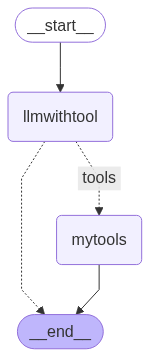

In [44]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [45]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})

In [46]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [47]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='74083f80-f729-47cc-8f15-3dfd85f0b5b5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rqctt9r4c', 'function': {'arguments': '{"query":"weather in delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 946, 'total_tokens': 1026, 'completion_time': 0.145454545, 'prompt_time': 0.04065428, 'queue_time': 0.24739198100000004, 'total_time': 0.186108825}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8802ea74-8bff-461f-9c35-41cdd47c3b6f-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in delhi'}, 'id': 'rqctt9r4c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 946, 'output_tokens': 80, 'total_tokens': 1026}),
  ToolMessage(content='the temp is 45 degree and sunny', name='search', id='2e5

In [48]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='c63862cc-e420-40b1-b63e-85afc20f58c5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'zk3rewbnd', 'function': {'arguments': '{"query":"hi how are you"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 944, 'total_tokens': 1027, 'completion_time': 0.150909091, 'prompt_time': 0.053364327, 'queue_time': 0.24861096300000002, 'total_time': 0.204273418}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--486993d3-afca-4bc6-ae90-1707713203f6-0', tool_calls=[{'name': 'search', 'args': {'query': 'hi how are you'}, 'id': 'zk3rewbnd', 'type': 'tool_call'}], usage_metadata={'input_tokens': 944, 'output_tokens': 83, 'total_tokens': 1027}),
  ToolMessage(content='the temp is 25 degree and cloudy', name='search', id='45fa0add-ea06-427

In [49]:
workflow2.add_edge("mytools","llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [50]:
app3 = workflow2.compile()

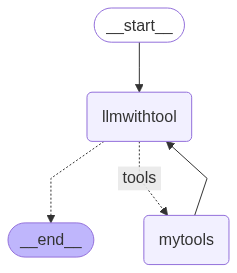

In [51]:
display(Image(app3.get_graph().draw_mermaid_png()))

In [52]:
for output in app3.stream({"messages":["what is a weather in new hyderabad?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '61wk5z4jb', 'function': {'arguments': '{"query":"weather in new hyderabad"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 948, 'total_tokens': 1032, 'completion_time': 0.152727273, 'prompt_time': 0.04037255, 'queue_time': 0.260992041, 'total_time': 0.193099823}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7fae4a47-39ef-4836-a9ca-9a9617636b80-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in new hyderabad'}, 'id': '61wk5z4jb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 948, 'output_tokens': 84, 'total_tokens': 1032})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 25 degree and cloudy', name='search', id='a27d8133-6be4-40f1-a3a1-de9272211860', tool_c

GETTING RESULTS FROM MEMORY 

In [53]:
from langgraph.checkpoint.memory import MemorySaver

In [54]:
memory=MemorySaver()

In [55]:
workflow3=StateGraph(MessagesState)

In [56]:

workflow3.add_node("llmwithtool",call_model)

In [57]:
workflow3.add_node("mytools",tool_node)

In [58]:

workflow3.add_edge(START,"llmwithtool")

In [59]:
workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [60]:
workflow3.add_edge("mytools","llmwithtool")

In [61]:

app4=workflow3.compile(checkpointer=memory)

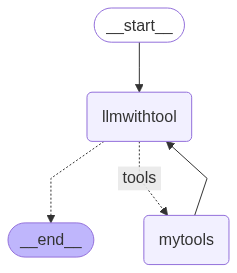

In [62]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [88]:

config={"configurable": {"thread_id": "1"}}

In [101]:
events=app4.stream(
    {"messages":["what is a weather in hyderabad"]},config=config,stream_mode="values"
    )

In [102]:
for event in events:
    event["messages"][-1].pretty_print()
    


================================ Human Message =================================

what is a weather in hyderabad
================================== Ai Message ==================================

The weather in Hyderabad is 25 degrees and cloudy.


In [106]:

events=app4.stream(
    {"messages":["what is a weather in pune?"]},config=config,stream_mode="values"
    )

In [107]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in pune?
================================== Ai Message ==================================
Tool Calls:
  search (w2x59dtp5)
 Call ID: w2x59dtp5
  Args:
    query: weather in pune
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

The weather in Pune is 25 degrees and cloudy.


In [116]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )

In [117]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================

The following cities have had a temperature of 25 degrees:

* Hyderabad
* Tirupati
* Mysore
* Punjab


In [118]:
config

{'configurable': {'thread_id': '1'}}

THIS GIVES ME HISTORY OF QUESTION I ASKED FOR 

In [119]:
memory.get(config)

{'v': 3,
 'ts': '2025-07-01T06:36:31.514446+00:00',
 'id': '1f05645b-99ac-61fc-8045-1d70a5e6f30e',
 'channel_versions': {'__start__': '00000000000000000000000000000070.0.5719344282756513',
  'messages': '00000000000000000000000000000071.0.41894129483496045',
  'branch:to:llmwithtool': '00000000000000000000000000000071.0.5724706022276007',
  'branch:to:mytools': '00000000000000000000000000000058.0.19745932217445217'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000069.0.8647259925463523'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000070.0.031044205123360702'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000057.0.053351758576190456'}},
 'pending_sends': [],
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='96f8c38c-4b0a-4e63-95ad-060c6d0d2a4b'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id'